<a href="https://colab.research.google.com/github/rookasrudzianskas/PytorchModels/blob/master/20_open_source_ML_Model_MULTI_CLASSIFICATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [200]:
# torchvision - base domain library for computer vision
import torch
from torch import nn

# torch vision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

# Importing matplot lib
import matplotlib.pyplot as pyplot

print(torch.__version__)
print(torchvision.__version__)

1.12.1+cu113
0.13.1+cu113


In [201]:
# Getting a dataset
train_data = datasets.FashionMNIST(
    root="data", # where to download the data to
    train=True, # Training data
    download=True, # Do I want to download
    transform=torchvision.transforms.ToTensor(), # how to transform the data
    target_transform=None # how to transform targets
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None    
)

In [202]:
len(train_data), len(test_data)

(60000, 10000)

In [203]:
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [204]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [205]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [206]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [207]:
# Check the shape of the image
print(f"Image shape: {image.shape}, [color, heiht, width]")
print(f"Image label: {class_names[label]}")

Image shape: torch.Size([1, 28, 28]), [color, heiht, width]
Image label: Ankle boot


Image shape torch.Size([1, 28, 28])


Text(0.5, 1.0, '9')

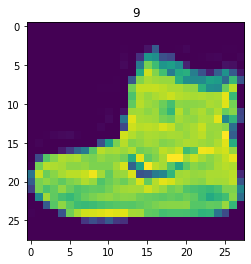

In [208]:
# Visualizing the data
import matplotlib.pyplot as plt
image, label = train_data[0]
print(f"Image shape {image.shape}")
plt.imshow(image.squeeze())
plt.title(label)

(-0.5, 27.5, 27.5, -0.5)

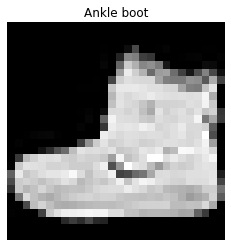

In [209]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)

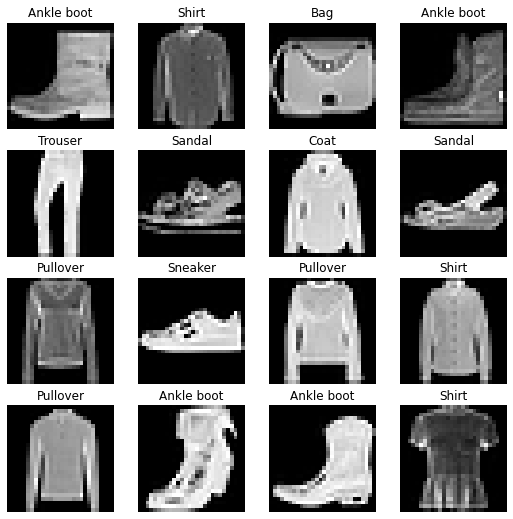

In [210]:
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows * cols + 1):
  random_idx = torch.randint(0, len(train_data), size=[1]).item()
  img, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(class_names[label])
  plt.axis(False)

In [211]:
# Prepare the data loader
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(), Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [212]:
# Dataloader turns dataset into the pytohon iterable

In [213]:
# Turning data into mini batches
from torch.utils.data import DataLoader

# Setup the bastch size hyperparameter
BATCH_SIZE = 32

# Turn datasets into interables to batches
train_dataloader = DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)

# For the test
test_dataloader = DataLoader(dataset=test_data, batch_size=BATCH_SIZE, shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7f9fe717bdd0>,
 <torch.utils.data.dataloader.DataLoader at 0x7f9fe717bc90>)

In [214]:
# Check out what I have created
print(f"DataLoaders: {train_dataloader} | {test_dataloader}")
print(f"Length of train_dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}...")
print(f"Lenght of test_dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

DataLoaders: <torch.utils.data.dataloader.DataLoader object at 0x7f9fe717bdd0> | <torch.utils.data.dataloader.DataLoader object at 0x7f9fe717bc90>
Length of train_dataloader: 1875 batches of 32...
Lenght of test_dataloader: 313 batches of 32


In [215]:
10000 / 32

312.5

In [216]:
# Check out what is inside the training data loader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 6, label size: torch.Size([])


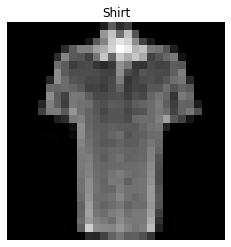

In [217]:
# Sample
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

In [218]:
# Baseline model, it is a simple model, I will try to improve with subsquent models/experiments
# start simply and add complexity then needed

In [219]:
# Creating a flatten layer
flatten_model = nn.Flatten()

# Get a single sample
x = train_features_batch[0]

# Flatten the sample
output = flatten_model(x) #Portform forward pass

# Print out what the heck is going on
print(f"Shape before flatteing {x.shape} -> [color channels, height, width")
print(f"Shape after flattenting {output.shape} -> color_channels, height * width")

Shape before flatteing torch.Size([1, 28, 28]) -> [color channels, height, width
Shape after flattenting torch.Size([1, 784]) -> color_channels, height * width


In [220]:
output.squeeze()

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0039, 0.0039, 0.0000, 0.0000, 0.0078, 0.0078,
        0.0000, 0.0000, 0.0039, 0.0078, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.2863, 0.0000, 0.0000, 0.0078, 

In [221]:
from torch import nn

class FashionMNISTModelV0(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        # Flatter, output of flatten must be the input to the second layer!!
        # It combines to the singular vector space
        nn.Flatten(),
        # Pass that flatten to this layer
        nn.Linear(in_features=input_shape, out_features=hidden_units),
        # The output goes to this layer, and it gets the output
        nn.Linear(in_features=hidden_units, out_features=output_shape)
    )

  def forward(self, x):
    return self.layer_stack(x)

In [222]:
torch.manual_seed(42)

# Setup the model with input params
model_0 = FashionMNISTModelV0(input_shape=784, # this is 28 * 26
                              hidden_units=10, # how many units in hidden layer
                              output_shape=len(class_names) # one for every class
                              ).to("cpu")



model_0                             

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [223]:
dummy_x = torch.rand([1, 1, 28, 28])
# One logit per one class I have
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

In [224]:
# Setup loss optimizer and evaluation metrics
# Loss function - will be nn.CrossEntropyLoss
# Optimizer = will be SGD() for stochastic gradient descent

In [225]:
import requests
from pathlib import Path

# Download the helper functions
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skippind dowginload")
else:
  print("Downloading the helper functions")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

helper_functions.py already exists, skippind dowginload


In [226]:
# Import the accuracy metric
from helper_functions import accuracy_fn

# Setup theloss function
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

In [227]:
# Creating a function to time out experiments

In [228]:
from timeit import default_timer as timer
def print_train_time(start: float, end: float, device: torch.device = None):
  # Prints differnetce between start and end times
  total_time = end - start
  print(f"Train time on {device}: {total_time:.3f} seconds")
  return total_time

In [229]:
start_time = timer()
# Some code
end_time = timer()

print_train_time(start=start_time, end=end_time, device="cpu")

Train time on cpu: 0.000 seconds


5.098400106362533e-05

In [230]:
# The optimzer will update the models params once per batch rather than once per epoch

In [231]:
# The training loop with batches
# Import tqdm for progress bar
from tqdm.auto import tqdm

# Set the see and set the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# Set the number of epochs
epochs = 3

# Create the training looop
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch} --------------")
  # Training
  train_loss = 0
  # Add the loop to loop throught the training batches
  for batch, (X, y) in enumerate(train_dataloader):
    model_0.train()
    # Forward pass
    y_pred = model_0(X)
    
    # Calculate the loss
    loss = loss_fn(y_pred, y)
    train_loss += loss # we add the loss every batch
    # Optimzie the zero grad
    optimizer.zero_grad()
    # Loss bachward
    loss.backward()
    # Optimizer step
    optimizer.step()


    if batch % 400 == 0:
      print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples.")

  # Adjust the training loos, in epoch loop
  # Divide the total training loos, by lenght of train data loader
  train_loss /= len(train_dataloader)

  # Testing loop
  test_loss, test_acc = 0, 0
  model_0.eval()
  with torch.inference_mode():
    for X_test, y_test in test_dataloader:
      # Forward pass
      test_pred = model_0(X_test)
      # Calculate the loss
      test_loss += loss_fn(test_pred, y_test)
      # Calculate the accuracy
      test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))
    
    # Calculate the test loss avarage per batch
    test_loss /= len(test_dataloader)

    # Calculate the test acc avarage per batch
    test_acc /= len(test_dataloader)

  # Print what is happening
  print(f"Train loss: {train_loss:.4f} | test loss: {test_loss:.4f}, test acc: {test_acc:.4f}")

# Calculate the training time
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu, end=train_time_end_on_cpu, device=str(next(model_0.parameters()).device))


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0 --------------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.
Train loss: 0.5904 | test loss: 0.5095, test acc: 82.0387
Epoch: 1 --------------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.
Train loss: 0.4763 | test loss: 0.4799, test acc: 83.1969
Epoch: 2 --------------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.
Train loss: 0.4550 | test loss: 0.4766, test acc: 83.4265
Train time on cpu: 23.715 seconds


In [232]:
next(model_0.parameters())

Parameter containing:
tensor([[ 0.0273,  0.0298, -0.0065,  ...,  0.0071,  0.0091,  0.0170],
        [-0.0189, -0.0355,  0.0155,  ...,  0.0161,  0.0120,  0.0117],
        [-0.0008,  0.0020,  0.0032,  ...,  0.0058, -0.0146,  0.0084],
        ...,
        [-0.0116,  0.0274, -0.0323,  ...,  0.0527,  0.0434,  0.0006],
        [-0.0231,  0.0252,  0.0236,  ..., -0.0892, -0.0385, -0.0071],
        [ 0.0175, -0.0148,  0.0027,  ..., -0.1155, -0.0674,  0.0125]],
       requires_grad=True)

In [298]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module, 
               data_loader: torch.utils.data.DataLoader, 
               loss_fn: torch.nn.Module, 
               accuracy_fn,
               device=device):
    """Returns a dictionary containing the results of model predicting on data_loader.

    Args:
        model (torch.nn.Module): A PyTorch model capable of making predictions on data_loader.
        data_loader (torch.utils.data.DataLoader): The target dataset to predict on.
        loss_fn (torch.nn.Module): The loss function of model.
        accuracy_fn: An accuracy function to compare the models predictions to the truth labels.

    Returns:
        (dict): Results of model making predictions on data_loader.
    """
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            # Make predictions with the model
            y_pred = model(X)
            
            # Accumulate the loss and accuracy values per batch
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y, 
                                y_pred=y_pred.argmax(dim=1)) # For accuracy, need the prediction labels (logits -> pred_prob -> pred_labels)
        
        # Scale loss and acc to find the average loss/acc per batch
        loss /= len(data_loader)
        acc /= len(data_loader)
        
    return {"model_name": model.__class__.__name__, # only works when model was created with a class
            "model_loss": loss.item(),
            "model_acc": acc}

# Calculate model 0 results on test dataset
model_0_results = eval_model(model=model_0, data_loader=test_dataloader,
    loss_fn=loss_fn, accuracy_fn=accuracy_fn
)
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

In [299]:
# torch.manual_seed(42)

# # Note: This will error due to `eval_model()` not using device agnostic code 
# model_1_results = eval_model(model=model_1, 
#     data_loader=test_dataloader,
#     loss_fn=loss_fn, 
#     accuracy_fn=accuracy_fn, device=device) 
# model_1_results 

In [300]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

In [301]:
# The device agnostic code

!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [302]:
torch.cuda.is_available()

False

In [303]:
# Setup device agnostic code
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [304]:
# Model 1:
# With non lineary
class FashionMNISTModelV1(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(), # flatten to the single vector
        nn.Linear(in_features=input_shape, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_shape),
        nn.ReLU()
    )

  def forward(self, x: torch.Tensor):
    return self.layer_stack(x)

In [305]:
# Create an isntalce of model
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(
    input_shape=784, # this is output of flatten after 28*28 image goes in
    hidden_units=10,
    output_shape=len(class_names)
).to(device) # send to the GPU if it is available

next(model_1.parameters()).device

device(type='cpu')

In [306]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [307]:
# setup loss and evaluation
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss() # measure how wrong the model is
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.1) #tries to update the model params to reduce the loss

In [308]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
    train_loss, train_acc = 0, 0
    for batch, (X, y) in enumerate(data_loader):
        # Send data to GPU
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y_true=y,
                                 y_pred=y_pred.argmax(dim=1)) # Go from logits -> pred labels

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

    # Calculate loss and accuracy per epoch and print out what's happening
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")

In [309]:
def test_step(data_loader: torch.utils.data.DataLoader,
              model: torch.nn.Module,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
    test_loss, test_acc = 0, 0
    model.eval() # put model in eval mode
    # Turn on inference context manager
    with torch.inference_mode(): 
        for X, y in tqdm(data_loader):
            # Send data to GPU
            X, y = X.to(device), y.to(device)
            
            # 1. Forward pass
            test_pred = model(X)
            
            # 2. Calculate loss and accuracy
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y,
                y_pred=test_pred.argmax(dim=1) # Go from logits -> pred labels
            )
        
        # Adjust metrics and print out
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")

In [310]:
torch.manual_seed(42)

# Measure the time
from timeit import default_timer as timer
train_time_start_on_gpu = timer()

# Set epochs
epochs = 3

# Create a optimizatioon and evaluation loop using train_step and test_step
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch} --------")
  train_step(data_loader=train_dataloader, 
        model=model_1, 
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn
    )
  test_step(data_loader=test_dataloader,
      model=model_1,
      loss_fn=loss_fn,
      accuracy_fn=accuracy_fn
  )

train_time_end_on_gpu=timer()
total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu, end=train_time_end_on_gpu, device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0 --------
Train loss: 1.09199 | Train accuracy: 61.34%


  0%|          | 0/313 [00:00<?, ?it/s]

Test loss: 0.95636 | Test accuracy: 65.00%

Epoch: 1 --------
Train loss: 0.73779 | Train accuracy: 73.69%


  0%|          | 0/313 [00:00<?, ?it/s]

Test loss: 0.72300 | Test accuracy: 74.24%

Epoch: 2 --------
Train loss: 0.66776 | Train accuracy: 76.08%


  0%|          | 0/313 [00:00<?, ?it/s]

Test loss: 0.68743 | Test accuracy: 75.66%

Train time on cpu: 26.673 seconds


Note sometimes, depending on my data, the model trains faster on cpu than the GPU

It could be that overhead from copying data model to and from the gpu overweights the compute benefits offered by the GPU

In [311]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

In [312]:
# Train time on cpu
total_train_time_model_1

26.672620872999687

In [313]:
torch.manual_seed(42)

# Note: This will error due to `eval_model()` not using device agnostic code 
model_1_results = eval_model(model=model_1, 
    data_loader=test_dataloader,
    loss_fn=loss_fn, 
    accuracy_fn=accuracy_fn) 
model_1_results 

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6874349117279053,
 'model_acc': 75.65894568690096}

In [314]:
# Create a convolutional neural network 
class FashionMNISTModelV2(nn.Module):
    """
    Model architecture copying TinyVGG from: 
    https://poloclub.github.io/cnn-explainer/
    """
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, 
                      out_channels=hidden_units, 
                      kernel_size=3, # how big is the square that's going over the image?
                      stride=1, # default
                      padding=1),# options = "valid" (no padding) or "same" (output has same shape as input) or int for specific number 
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, 
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2) # default stride value is same as kernel_size
        )
        self.block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            # Where did this in_features shape come from? 
            # It's because each layer of our network compresses and changes the shape of our inputs data.
            nn.Linear(in_features=hidden_units*7*7, 
                      out_features=output_shape)
        )
    
    def forward(self, x: torch.Tensor):
        x = self.block_1(x)
        # print(x.shape)
        x = self.block_2(x)
        # print(x.shape)
        x = self.classifier(x)
        # print(x.shape)
        return x

torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1, 
    hidden_units=10, 
    output_shape=len(class_names)).to(device)
model_2

FashionMNISTModelV2(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [315]:
len(class_names)

10

In [316]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1,
                              hidden_units=10,
                              output_shape=len(class_names)
                              ).to(device)

torch.Size([1, 28, 28])

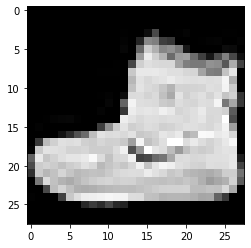

In [317]:
plt.imshow(image.squeeze(), cmap="gray")
image.shape

In [318]:
rand_image_tensor = torch.randn(size=(1, 28, 28))
rand_image_tensor.shape

torch.Size([1, 28, 28])

In [319]:
10 * 7 * 7

490

In [320]:
# Pass image throught the modal
# model_2(rand_image_tensor.unsqueeze(0).to(device))

In [321]:
# Stepping through the nn.Conv2D


In [322]:
torch.manual_seed(42)

# Create a batch of images
images = torch.rand(size=(32, 3, 64, 64))
test_image = images[0]

print(f"Image batch shape: {images.shape}")
print(f"Single image shape: {test_image.shape}")
print(f"Test image: \n {test_image}")

Image batch shape: torch.Size([32, 3, 64, 64])
Single image shape: torch.Size([3, 64, 64])
Test image: 
 tensor([[[0.8823, 0.9150, 0.3829,  ..., 0.1587, 0.6542, 0.3278],
         [0.6532, 0.3958, 0.9147,  ..., 0.2083, 0.3289, 0.1054],
         [0.9192, 0.4008, 0.9302,  ..., 0.5535, 0.4117, 0.3510],
         ...,
         [0.1457, 0.1499, 0.3298,  ..., 0.9624, 0.6400, 0.7409],
         [0.1709, 0.5797, 0.6340,  ..., 0.6885, 0.2405, 0.5956],
         [0.9199, 0.1247, 0.3573,  ..., 0.6752, 0.2058, 0.5027]],

        [[0.1458, 0.9024, 0.9217,  ..., 0.1868, 0.6352, 0.8431],
         [0.9549, 0.4435, 0.6924,  ..., 0.1168, 0.7160, 0.5462],
         [0.1616, 0.1054, 0.8614,  ..., 0.4531, 0.4736, 0.9448],
         ...,
         [0.4309, 0.3986, 0.1907,  ..., 0.9444, 0.2848, 0.3776],
         [0.7948, 0.6855, 0.1009,  ..., 0.6147, 0.7747, 0.2323],
         [0.5840, 0.9795, 0.3277,  ..., 0.3549, 0.1263, 0.1280]],

        [[0.5027, 0.4195, 0.8893,  ..., 0.3084, 0.1567, 0.7860],
         [0.7310, 

In [323]:
# model_2.state_dict()
test_image.shape

torch.Size([3, 64, 64])

In [324]:
torch.manual_seed(42)

# Create a single conv2d layer
conv_layer = nn.Conv2d(in_channels=3, out_channels=10, kernel_size=(3, 3), stride=1, padding=0)
# Pass the data through the conv layer
conv_output = conv_layer(test_image.unsqueeze(0))
conv_output

tensor([[[[ 0.6552,  0.5381,  0.4456,  ...,  0.3679,  0.1734,  0.2343],
          [ 0.4011,  0.2772,  0.4309,  ...,  0.0474,  0.3547,  0.4406],
          [ 0.5072,  0.6963,  0.3967,  ...,  0.5034,  0.3260,  0.4359],
          ...,
          [ 0.3767,  0.4173,  0.7551,  ...,  0.5548,  0.5815,  0.2547],
          [ 0.4143,  0.6770,  0.5922,  ...,  0.7285,  0.3320,  0.5752],
          [ 0.1725,  0.3980,  0.5999,  ...,  0.4316,  0.5133,  0.3385]],

         [[ 0.0954, -0.0688, -0.1089,  ...,  0.0185, -0.4996, -0.0184],
          [-0.0188, -0.1703, -0.1344,  ..., -0.2991, -0.0339,  0.1632],
          [-0.1585, -0.0837, -0.0159,  ...,  0.0026,  0.1540, -0.1372],
          ...,
          [-0.0297, -0.0980, -0.0731,  ...,  0.0623, -0.1080, -0.0946],
          [-0.1508, -0.1934,  0.2011,  ...,  0.0415, -0.0989,  0.2556],
          [ 0.0447,  0.1020, -0.1685,  ...,  0.0908, -0.0682, -0.2266]],

         [[ 0.0098,  0.1790,  0.3092,  ...,  0.2502,  0.2292, -0.0542],
          [-0.0979,  0.1598,  

In [325]:
test_image.shape

torch.Size([3, 64, 64])

In [326]:
torch.manual_seed(42)

# Create a single conv2d layer
conv_layer = nn.Conv2d(in_channels=3, out_channels=10, kernel_size=(3, 3), stride=1, padding=1)
# Pass the data through the conv layer
conv_output = conv_layer(test_image.unsqueeze(0))
conv_output.shape

torch.Size([1, 10, 64, 64])

In [327]:
# Stepping through nn.MaxPool2D()

In [328]:
# Print
test_image.shape

torch.Size([3, 64, 64])

In [329]:
print(f"Test image original shape: {test_image.shape}")
print(f"test image with unsquueze dimension: {test_image.unsqueeze(0).shape}")

# Create a sample MaxPool2D layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Pass data throught just the conv layer
test_image_through_conv = conv_layer(test_image.unsqueeze(dim=0))
print(f"Shape after going throught conv layer: {test_image_through_conv.shape}")

# Pass data through max pool layer
test_image_through_conv_and_max_pool = max_pool_layer(test_image_through_conv)

print(f"Shape after going throug conv layer and max pool layer: {test_image_through_conv_and_max_pool.shape}")

Test image original shape: torch.Size([3, 64, 64])
test image with unsquueze dimension: torch.Size([1, 3, 64, 64])
Shape after going throught conv layer: torch.Size([1, 10, 64, 64])
Shape after going throug conv layer and max pool layer: torch.Size([1, 10, 32, 32])


In [330]:
test_image

tensor([[[0.8823, 0.9150, 0.3829,  ..., 0.1587, 0.6542, 0.3278],
         [0.6532, 0.3958, 0.9147,  ..., 0.2083, 0.3289, 0.1054],
         [0.9192, 0.4008, 0.9302,  ..., 0.5535, 0.4117, 0.3510],
         ...,
         [0.1457, 0.1499, 0.3298,  ..., 0.9624, 0.6400, 0.7409],
         [0.1709, 0.5797, 0.6340,  ..., 0.6885, 0.2405, 0.5956],
         [0.9199, 0.1247, 0.3573,  ..., 0.6752, 0.2058, 0.5027]],

        [[0.1458, 0.9024, 0.9217,  ..., 0.1868, 0.6352, 0.8431],
         [0.9549, 0.4435, 0.6924,  ..., 0.1168, 0.7160, 0.5462],
         [0.1616, 0.1054, 0.8614,  ..., 0.4531, 0.4736, 0.9448],
         ...,
         [0.4309, 0.3986, 0.1907,  ..., 0.9444, 0.2848, 0.3776],
         [0.7948, 0.6855, 0.1009,  ..., 0.6147, 0.7747, 0.2323],
         [0.5840, 0.9795, 0.3277,  ..., 0.3549, 0.1263, 0.1280]],

        [[0.5027, 0.4195, 0.8893,  ..., 0.3084, 0.1567, 0.7860],
         [0.7310, 0.9307, 0.2847,  ..., 0.8432, 0.8307, 0.0897],
         [0.7021, 0.5967, 0.7744,  ..., 0.8485, 0.4520, 0.

In [331]:
torch.manual_seed(42)
# Random tensor, with similar number of dimensions
# [1, 2, 64, 64] -> these are dimensions

random_tensor = torch.randn(size=(1, 1, 2, 2))
print(f"Rnadom tensor: {random_tensor}")
print(f"Rnadom tensor shape: {random_tensor.shape}")
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# This pass the random tensor throught the max pool layer
max_pool_tensor = max_pool_layer(random_tensor)
print(f"Max pool tensor: {max_pool_tensor}")
print(f"Max pool tensor shape: {max_pool_tensor.shape}")

Rnadom tensor: tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])
Rnadom tensor shape: torch.Size([1, 1, 2, 2])
Max pool tensor: tensor([[[[0.3367]]]])
Max pool tensor shape: torch.Size([1, 1, 1, 1])


In [332]:
# Setup loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(), 
                             lr=0.1)

In [333]:
model_2.state_dict()

OrderedDict([('block_1.0.weight', tensor([[[[ 0.2548,  0.2767, -0.0781],
                        [ 0.3062, -0.0730,  0.0673],
                        [-0.1623,  0.1958,  0.2938]]],
              
              
                      [[[-0.2445,  0.2897,  0.0624],
                        [ 0.2463,  0.0451,  0.1607],
                        [-0.0471,  0.2570,  0.0493]]],
              
              
                      [[[-0.1556,  0.0850, -0.1536],
                        [-0.0391, -0.1354,  0.2211],
                        [-0.2631, -0.1537, -0.0941]]],
              
              
                      [[[-0.2004,  0.0315, -0.3292],
                        [ 0.3010, -0.2832,  0.2573],
                        [ 0.0555, -0.1082,  0.2060]]],
              
              
                      [[[ 0.0520,  0.2693,  0.0364],
                        [-0.1051,  0.0896, -0.0904],
                        [ 0.1403,  0.2976,  0.1927]]],
              
              
                      [[[

In [334]:
torch.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_model_2 = timer()

# Train and test model 
epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(data_loader=train_dataloader, 
        model=model_2, 
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn,
        device=device
    )
    test_step(data_loader=test_dataloader,
        model=model_2,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn,
        device=device
    )

train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(start=train_time_start_model_2,
                                           end=train_time_end_model_2,
                                           device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 0.59518 | Train accuracy: 78.38%


  0%|          | 0/313 [00:00<?, ?it/s]

Test loss: 0.39500 | Test accuracy: 85.99%

Epoch: 1
---------
Train loss: 0.36421 | Train accuracy: 86.86%


  0%|          | 0/313 [00:00<?, ?it/s]

Test loss: 0.38940 | Test accuracy: 86.13%

Epoch: 2
---------
Train loss: 0.32472 | Train accuracy: 88.31%


  0%|          | 0/313 [00:00<?, ?it/s]

Test loss: 0.34938 | Test accuracy: 87.46%

Train time on cpu: 172.723 seconds


In [335]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [336]:
# Get ther esults dictionary
model_2_results = eval_model(
    model=model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn,
    device=device
)

model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.34938228130340576,
 'model_acc': 87.46006389776358}

In [337]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

In [339]:
# Compare the results acroos the experiments
import pandas as pd
compare_results = pd.DataFrame([model_0_results, model_1_results, model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.476639,83.426518
1,FashionMNISTModelV1,0.687435,75.658946
2,FashionMNISTModelV2,0.349382,87.460064


In [341]:
# Add the training time to the results comparison
compare_results["training_time"] = [total_train_time_model_0, total_train_time_model_1, total_train_time_model_2]
compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelV0,0.476639,83.426518,23.715354
1,FashionMNISTModelV1,0.687435,75.658946,26.672621
2,FashionMNISTModelV2,0.349382,87.460064,172.722769


Text(0, 0.5, 'model')

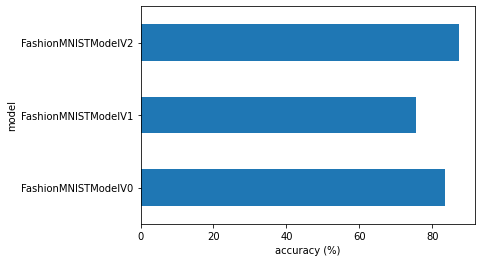

In [344]:
# Visualize the model results
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("accuracy (%)")
plt.ylabel("model")

In [345]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [347]:
# Make and evaluate the predictions with the best model
def make_predictions(model: torch.nn.Module, data: list, device: torch.device = device):
  pred_probs = []
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
      # Prepare the sample, add the batch dimension ,adn pass to the target device
      sample = torch.torch.unsqueeze(sample, dim=0).to(device)

      # Forward pass (model outputs raw logits)
      pred_logit = model(sample)

      # Get prediction probability logit -> prediction probability
      pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

      # Get pred_prob off GPU for futher calculations
      pred_probs.append(pred_prob.cpu())

  # Stack the pred probs to turn list into the tensor
  return torch.stack(pred_probs)


In [354]:
import random

random.seed(42)
test_samples = []
test_labels = []

for sample, label in random.sample(list(test_data), k=9):
  test_samples.append(sample)
  test_labels.append(label)

# View the first sample shape
test_samples[0].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Sandal')

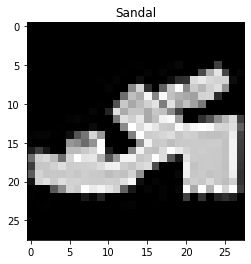

In [355]:
plt.imshow(test_samples[0].squeeze(), cmap="gray")
plt.title(class_names[test_labels[0]])

In [358]:
# Make predictions
pred_probs = make_predictions(model=model_2, data=test_samples)

# View the first two prediction probabilities
pred_probs[:2]

tensor([[2.7525e-07, 1.3385e-07, 3.3624e-07, 6.1825e-07, 3.5886e-08, 9.9495e-01,
         2.0080e-07, 1.7272e-04, 4.1631e-05, 4.8373e-03],
        [1.0882e-02, 9.1716e-01, 3.1378e-04, 4.5055e-02, 2.0009e-03, 8.8222e-06,
         2.3542e-02, 1.1175e-04, 8.5854e-04, 6.4103e-05]])

In [359]:
# Convert prediction probabilities to labels
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([5, 1, 7, 2, 3, 0, 4, 7, 1])

In [360]:
test_labels

[5, 1, 7, 4, 3, 0, 4, 7, 1]